In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')
import enelvo
from enelvo.normaliser import Normaliser
import re
import unidecode

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from mittens import GloVe, Mittens

#from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

[nltk_data] Downloading package punkt to /home/joao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
PATH = "/home/joao/Desktop/UFMG/sonhos_confinados/data/"

In [321]:
df = pd.read_csv(PATH+"/sonhos_processado.csv")

In [323]:
df[df["sonhos_norm"].str.contains("vacina")].shape
#df[df["palavras_proc"].str.contains("fé")].topic.value_counts()

(17, 19)

# Word2Vec

## Modelos Pré Treinados

In [ ]:
load_big= False

In [ ]:
if load_big:
    glove_300 = KeyedVectors.load_word2vec_format("embeddings/glove_s300.txt")

In [101]:
glove_100 = KeyedVectors.load_word2vec_format("embeddings/glove_s100.txt")

In [ ]:
glove_50 = KeyedVectors.load_word2vec_format("embeddings/glove_s50.txt")

In [ ]:
if load_big:
    skip_300 = KeyedVectors.load_word2vec_format("embeddings/skip_s300.txt")

In [149]:
skip_100 = KeyedVectors.load_word2vec_format("embeddings/skip_s100.txt")

In [ ]:
skip_50 = KeyedVectors.load_word2vec_format("embeddings/skip_s50.txt")

In [ ]:
if load_big:
    pregloves = [glove_50, glove_100,glove_300]
    preskips = [skip_50, skip_100, skip_300]
else:
    pregloves = [glove_50, glove_100]
    preskips = [skip_50, skip_100]

## Nosso word2vec

In [117]:
WINDOW = 5
NEGATIVE = 5

In [3]:
df_corpus = pd.read_csv(PATH+"/sonhos_processado_pontuado.csv")

In [4]:
df_corpus = df_corpus[['sonhos_norm']]
df_corpus = df_corpus.dropna(axis=0)

In [5]:
df_corpus.head()

sonhos_norm
0  atravessei uma praça onde tinha uma manifestaç...
1  estava em um festival ouvi uma explosão abriu ...
2  lo numa pedra ilhada sobre o mar observo de lo...
3  sonhei que bolsonaro dava um golpe de estado e...
4  eu estava em perigo minha casa tava desmoronan...

In [256]:
#corpus = ""
#for sonho in df_corpus.sonhos_norm:
#    if sonho[-1] != '.':
#        sonho += '.'
#    corpus += sonho
#    
#texto =  re.findall(r'\b[A-zÀ-úü]+\b', corpus.lower())

In [257]:
corpus = ""
for sonho in df_corpus.sonhos_norm:

    sonho += '\n'
    corpus += sonho
    
texto =  re.findall(r'\b[A-zÀ-úü]+\b', corpus.lower())

In [259]:
with open(r'/home/joao/Desktop/UFMG/sonhos_confinados/glove/glove/corpus.txt', 'w') as fp:
    fp.write("%s\n" % corpus)
    print('Done')

Done


In [216]:
sonhos = nltk.Text(texto)

In [260]:
def create_sentences(sentences):
    for i in range(len(sentences)):
        #sentences[i] = sentences[i].split(' ')
        sentences[i] = word_tokenize(sentences[i])
    return sentences

#sentences_normalised = create_sentences(sent_tokenize(corpus))
sentences_normalised = create_sentences(corpus.split("\n"))

In [261]:
sentences_normalised

[['atravessei',
  'uma',
  'praça',
  'onde',
  'tinha',
  'uma',
  'manifestação',
  'próxima',
  'de',
  'gente',
  'com',
  'a',
  'camisa',
  'do',
  'brasil',
  'para',
  'entrar',
  'em',
  'um',
  'prédio',
  'casa',
  'que',
  'estava',
  'toda',
  'minha',
  'família',
  'e',
  'até',
  'parentes',
  'que',
  'já',
  'se',
  'foram',
  'e',
  'estavam',
  'todos',
  'doentes'],
 ['estava',
  'em',
  'um',
  'festival',
  'ouvi',
  'uma',
  'explosão',
  'abriu',
  'um',
  'rio',
  'de',
  'lava',
  'uma',
  'máquina',
  'instalou',
  'um',
  'dispositivo',
  'em',
  'mim',
  'e',
  'em',
  'outras',
  'pessoas',
  'através',
  'do',
  'qual',
  'era',
  'possível',
  'estabelecer',
  'relação',
  'com',
  'as',
  'pessoas',
  'ao',
  'me',
  'conectar',
  'com',
  'elas',
  'parecia',
  'que',
  'estávamos',
  'indo',
  'atrás',
  'da',
  'máquina',
  'que',
  'estava',
  'instalando',
  'esse',
  'dispositivo',
  'com',
  'o',
  'objetivo',
  'de',
  'parar',
  'com',
  'isso

In [265]:
model_sg_50 = Word2Vec(
                 sg=1, 
                 vector_size=50,  
                 workers=4,
                 epochs=30,
                 window = WINDOW,
                 negative = NEGATIVE)

model_sg_50.build_vocab(sentences_normalised)
model_sg_50.train(sentences_normalised,total_examples=model_sg_50.corpus_count,epochs=50)

(5580655, 8906750)

In [266]:
model_sg_50.wv.most_similar("máscara")

[('aglomerações', 0.7589346766471863),
 ('sem', 0.727239191532135),
 ('desesperada', 0.6473280191421509),
 ('máscaras', 0.6456611156463623),
 ('usavam', 0.6438245177268982),
 ('usando', 0.6097931265830994),
 ('públicos', 0.6055222153663635),
 ('uso', 0.6021079421043396),
 ('eventos', 0.589326798915863),
 ('dou', 0.5769479274749756)]

In [ ]:
model_sg_100 = Word2Vec(
                 sg=1, 
                 vector_size=100,  
                 workers=4,
                 epochs=30,
                 window = WINDOW,
                 negative = NEGATIVE)

model_sg_100.build_vocab(sentences_normalised)
model_sg_100.train(sentences_normalised,total_examples=model_sg_100.corpus_count,epochs=50)

In [226]:
model_sg_300 = Word2Vec(
                 sg=1, 
                 vector_size=300,  
                 workers=4,
                 epochs=30,
                 window = WINDOW,
                 negative = NEGATIVE)

model_sg_300.build_vocab(sentences_normalised)
model_sg_300.train(sentences_normalised,total_examples=model_sg_300.corpus_count,epochs=50)

(5532574, 8873500)

In [230]:
model_sg_300.wv.most_similar("mãe")

[('falecida', 0.3467283546924591),
 ('minha', 0.34587234258651733),
 ('falecidos', 0.3453982472419739),
 ('tias', 0.31836336851119995),
 ('lotada', 0.3013399839401245),
 ('sogra', 0.29729682207107544),
 ('idosa', 0.2944353520870209),
 ('voltamos', 0.2927399277687073),
 ('câncer', 0.287416934967041),
 ('nua', 0.281004935503006)]

In [ ]:
if load_big:
    skips = [model_sg_50, model_sg_100, model_sg_300]
else:
    skips = [model_sg_50, model_sg_100]

# Glove

In [232]:
with open(r'/home/joao/Desktop/UFMG/sonhos_confinados/glove/glove/vectors.txt', 'r') as fp:
    for line in fp:
        print(line)

e -0.019461 -0.474988 1.002922 -0.081314 -0.576694 0.314956 -0.376939 1.019688 0.312055 -0.109905 0.133595 -0.707342 -0.034590 -0.017747 0.991516 0.671426 0.486367 -1.625343 0.728868 -0.093961 -1.195587 -1.424891 2.195204 -0.242623 -0.797803 0.545136 -0.308464 -0.400734 -0.280165 0.160554 0.083258 0.069749 -0.201497 0.397831 -0.060792 0.499171 0.511633 0.086016 -0.065982 -0.350142 0.035222 -0.783703 0.230722 0.871724 1.000778 -1.726096 1.300532 -0.068651 0.306310 -0.017110

que -0.256714 0.152166 -0.531675 0.331357 -0.536114 0.687442 -1.710000 0.087675 0.728757 -0.057405 -0.196582 -0.371327 0.340903 -0.653156 0.241231 -0.213742 -0.286458 -2.185783 0.687180 0.133087 -0.503432 -0.567577 0.445412 0.099151 -1.251448 -0.154195 -0.619788 1.174702 0.532692 0.418260 0.534303 0.132291 -1.126885 -0.156712 -0.403171 1.481787 0.004096 0.186204 1.577283 0.180715 0.182934 -0.467387 0.457933 0.930420 1.813681 -0.722090 0.145875 -1.934631 -0.500170 -0.055304

de 0.638015 -0.094490 0.587224 -0.175023 -

In [251]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
glove_file = datapath('/home/joao/Desktop/UFMG/sonhos_confinados/glove/glove/50/vectors.txt')
tmp_file = get_tmpfile("test_word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)
glove50 = KeyedVectors.load_word2vec_format(tmp_file)

/home/joao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  """


In [252]:
glove_file = datapath('/home/joao/Desktop/UFMG/sonhos_confinados/glove/glove/100/vectors.txt')
tmp_file = get_tmpfile("test_word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)
glove100 = KeyedVectors.load_word2vec_format(tmp_file)

/home/joao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  This is separate from the ipykernel package so we can avoid doing imports until


In [253]:
glove_file = datapath('/home/joao/Desktop/UFMG/sonhos_confinados/glove/glove/300/vectors.txt')
tmp_file = get_tmpfile("test_word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)
glove300 = KeyedVectors.load_word2vec_format(tmp_file)

/home/joao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  This is separate from the ipykernel package so we can avoid doing imports until


In [250]:
model.most_similar("máscara")

[('sem', 0.8371166586875916),
 ('usando', 0.7970192432403564),
 ('desesperada', 0.679495632648468),
 ('roupa', 0.6449003219604492),
 ('procurando', 0.6328251361846924),
 ('fico', 0.6099456548690796),
 ('usava', 0.6075798869132996),
 ('festa', 0.592258632183075),
 ('máscaras', 0.5907921195030212),
 ('ninguém', 0.5822569131851196)]

# Co-occurence Matrix

In [ ]:
corpus = corpus.split(".")

In [ ]:
def clean_and_tokenize(text):
    """
    Cleaning a document with:
        - Lowercase        
        - Removing numbers with regular expressions
        - Removing punctuation with regular expressions
        - Removing other artifacts
    And separate the document into words by simply splitting at spaces
    Params:
        text (string): a sentence or a document
    Returns:
        tokens (list of strings): the list of tokens (word units) forming the document
    """        
    # Lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r"[0-9]+", "", text)
    # Remove punctuation
    REMOVE_PUNCT = re.compile("[.;:!\'?,\"()\[\]]")
    text = REMOVE_PUNCT.sub("", text)
    # Remove HTML artifacts specific to the corpus we're going to work with
    REPLACE_HTML = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    text = REPLACE_HTML.sub(" ", text)
    
    tokens = text.split()        
    return tokens

In [ ]:
from collections import Counter

def vocabulary(corpus, count_threshold=5, voc_threshold=10000):
    """    
    Function using word counts to build a vocabulary
    Params:
        corpus (list of strings): corpus of sentences
        count_threshold (int): number of occurences necessary for a word to be included in the vocabulary
        voc_threshold (int): maximum size of the vocabulary - 0 (default) indicates there is no max
    Returns:
        vocabulary (dictionary): keys: list of distinct words across the corpus
                                 values: indexes corresponding to each word sorted by frequency 
        vocabulary_word_counts (dictionary): keys: list of distinct words across the corpus
                                             values: word counts in the corpus
    """
    UNK = 'UNK'
    unknown = 0
    
    # use a counter
    voc = Counter(words for text in corpus for words in clean_and_tokenize(text))
    # print(voc)
    
    words_to_remove = set()
    # find which keys should be filtered out
    for k, v in voc.items():
        if v < count_threshold:
            words_to_remove.add(k)

    # filter out less frequent keys
    for w in words_to_remove:
        unknown += voc[w]
        # print(w, voc[w])
        del voc[w]
    
    # get the most common words
    vocabulary_word_counts = dict(voc.most_common(voc_threshold))
    # add the unkown token
    vocabulary_word_counts.update({UNK : unknown})
    # get the ordered indexes
    vocabulary = {k:v for (k,v) in zip(vocabulary_word_counts.keys(), range(len(vocabulary_word_counts)))}

    return vocabulary, vocabulary_word_counts

In [ ]:
def co_occurence_matrix(corpus, vocabulary, window=0, distance_weighting=False):
    """
    Params:
        corpus (list of list of strings): corpus of sentences
        vocabulary (dictionary): words to use in the matrix
        window (int): size of the context window; when 0, the context is the whole sentence
        distance_weighting (bool): indicates if we use a weight depending on the distance between words for co-oc counts
    Returns:
        matrix (array of size (len(vocabulary), len(vocabulary))): the co-oc matrix, using the same ordering as the vocabulary given in input    
    """ 
    l = len(vocabulary)
    M = np.zeros((l,l))
    for sent in corpus:
        # get the sentence
        sent = clean_and_tokenize(sent)
        # print('sent',sent)

        # get the sentence indexes (from vocabulary)
        sent_idx = [vocabulary[w] if w in vocabulary else -1 for w in sent]
        # print('sent_idx',sent_idx)

        # go through the sentence's indexes, adding 1/dist(i,j) to M[i,j] if the words of indexes i and j are on the same window.
        for i, idx_i in enumerate(sent_idx):
            # print('idx_i',idx_i)
            # check if word is in vocabulary:
            if idx_i > -1:
                # considering a limited (=windowed) context:
                if window > 0:
                    # create a list with the indexes of the window to the left of idx_i (the current index)
                    l_ctx_idx = sent_idx[i-window:i]
                    
                # if context is the whole sentence:
                else:
                    # create a list with the indexes to the left of idx_i (the current index)
                    l_ctx_idx = sent_idx[:i]
                    
                # print('l_ctx_idx',l_ctx_idx)
                
                # go through the list of the left context and update M[i,j]:
                for j, idx_j in enumerate(l_ctx_idx):
                    # check that the word on idx_j is recognized by the vocabulary
                    if idx_j > -1:
                        # obtain weight
                        if distance_weighting:
                            # the dist(i,j) is obtained as the size of the left window minus the position on the left window
                            weight = (len(l_ctx_idx) - j)
                        else:
                            weight = 1.0
                        M[idx_i, idx_j] += weight * 1.0
                        M[idx_j, idx_i] += weight * 1.0
    return M  

In [ ]:
# We would like to know how much of the data is represented by the 'k' most frequent words
print('Vocabulary size: %i' % len(vocab))
full_corpus_sz = sum(counts.values())

for num in [100, 1000, 5000, 10000]:
    _, red_word_counts = vocabulary(corpus, voc_threshold=num)
    del red_word_counts['UNK']
    reduced_corpus_sz = sum(red_word_counts.values())
    print(f'Part of the corpus by taking the {num} most frequent words : {reduced_corpus_sz}, or approx {round(reduced_corpus_sz/full_corpus_sz*100)} %')

In [ ]:
vocab_5k, word_counts_5k = vocabulary(corpus, 0, voc_threshold=5000)
M5dist = co_occurence_matrix(corpus, vocab_5k, window=5, distance_weighting=True)
M20 = co_occurence_matrix(corpus, vocab_5k, window=20, distance_weighting=False)
print(M5dist.shape)
print(M20.shape)

In [ ]:
def euclidean(u, v):
    return np.linalg.norm(u-v)

def length_norm(u):
    return u / np.sqrt(u.dot(u))

def cosine(u, v):
    return 1.0 - length_norm(u).dot(length_norm(v))

from sklearn.neighbors import NearestNeighbors

def print_neighbors(distance, voc, co_oc, mot, k=10):
    inv_voc = {id: w for w, id in voc.items()}
    neigh = NearestNeighbors(n_neighbors=k, algorithm='brute', metric=distance)
    neigh.fit(co_oc) 
    dist, ind = neigh.kneighbors([co_oc[voc[mot]]])
    print("Vizinhos mais próximos de %s segundo a distância '%s': " % (mot, distance.__name__))
    print([[inv_voc[i] for i in s[1:]] for s in ind])
    
    
    
palavra = "mãe"
print("Contexto maior:")    
print_neighbors(euclidean, vocab_5k, M20, palavra)
print_neighbors(cosine, vocab_5k, M20, palavra)
print("")
print("Contexto menor:")    
print_neighbors(euclidean, vocab_5k, M5dist, palavra)
print_neighbors(cosine, vocab_5k, M5dist, palavra) 

In [ ]:
PPMI5 = pmi(M5dist)
PPMI20 = pmi(M20)

print("Avec la PPMI:")    
print_neighbors(euclidean, vocab_5k, PPMI5, palavra)
print_neighbors(cosine, vocab_5k, PPMI5, palavra)
print_neighbors(euclidean, vocab_5k, PPMI20, palavra)
print_neighbors(cosine, vocab_5k, PPMI20, palavra)

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=300)
SVDEmbeddings = svd.fit_transform(M5dist)
print(SVDEmbeddings.shape)

print_neighbors(euclidean, vocab_5k, SVDEmbeddings, palavra)
print_neighbors(cosine, vocab_5k, SVDEmbeddings, palavra)

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

In [ ]:
new_sw = ["pessoa", "pessoas", "sonho", "sonhos", "sonhei", "tava", ".", "casa"]
stopwords += new_sw

In [ ]:
def remove_sw(texto):
    texto = [w for w in texto.split() if w not in stopwords]
    texto_limpo = " ".join(texto)
    return texto_limpo

In [ ]:
df = pd.read_csv(PATH+"/sonhos_processado.csv")

In [ ]:
df = df[['sonhos_norm']]

In [ ]:
df = df.dropna(axis=0)

In [ ]:
docs = list(df['sonhos_norm'])
docs_sw = [remove_sw(texto) for texto in docs]
df.sonhos_norm = docs_sw

In [ ]:
df.head()

In [ ]:
df.iloc[6].values

In [ ]:
df.shape

In [ ]:
countVec = CountVectorizer(max_features= 5000, stop_words=stopwords, min_df=10, max_df=.90)

In [ ]:
countVec.fit(df["sonhos_norm"])
#useful debug, get an idea of the item list you generated
list(countVec.vocabulary_.items())

In [ ]:
countVec_count = countVec.transform(df["sonhos_norm"])

In [ ]:
occ = np.asarray(countVec_count.sum(axis=0)).ravel().tolist()

In [ ]:
bowListFrame = pd.DataFrame({'term': countVec.get_feature_names(), 'occurrences': occ})
print(bowListFrame)


In [ ]:
bowListFrame.sort_values(by='occurrences', ascending=False).head(60)

In [ ]:
Transformer = TfidfTransformer()

In [ ]:
#initial fit representation using transformer object
weights = Transformer.fit_transform(countVec_count)

#follow similar process to making new data frame with word occurrences, but with term weights
weightsFin = np.asarray(weights.mean(axis=0)).ravel().tolist()

#now that we've done Tfid, make a dataframe with weights and names
weightFrame = pd.DataFrame({'term': countVec.get_feature_names(), 'weight': weightsFin})
print(weightFrame)
weightFrame.sort_values(by='weight', ascending=False).head(20)

# Comparando similaridades

In [ ]:
import sys

In [ ]:
for palavra in palavras:
    print("Referência: " + palavra.upper())
    print("Palavras mais similares, modelos pré treinados:")
    for precbow in precbows:
        print(f"Tamanho do vetor: {precbow.vector_size}")
        print(precbow.most_similar(palavra,topn=3))
    
    print()
    print("Palavras mais similares, nossos modelos:")
    for cbow in cbows:
        print(f"Tamanho do vetor: {cbow.vector_size}")
        print(cbow.wv.most_similar(palavra,topn=3))
    
    print()
    print("*************************")

In [ ]:
for palavra in palavras:
    print("Referência: " + palavra.upper())
    print("Palavras mais similares, modelos pré treinados:")
    for preskip in preskips:
        print(f"Tamanho do vetor: {preskip.vector_size}")
        print(preskip.most_similar(palavra,topn=3))
    
    print()
    print("Palavras mais similares, nossos modelos:")
    for skip in skips:
        print(f"Tamanho do vetor: {skip.vector_size}")
        print(skip.wv.most_similar(palavra,topn=3))
    
    print()
    print("*************************")

In [ ]:
soma = ["eu", "não"]

In [ ]:
result = cbow_50.most_similar(positive=soma, topn=5)
print(result)

In [ ]:
result = model_cbow_50.wv.most_similar(positive=soma, topn=5)
print(result)

In [ ]:
soma = ["mãe", "covid"]

In [ ]:
result = model_sg_300.wv.most_similar(positive=soma, topn=5)
print(result)

# WordSim

In [24]:
wsPath = "/home/joao/Desktop/UFMG/sonhos_confinados/WordSim/LX-WordSim-353.txt"

In [84]:
lines = []
with open(wsPath) as f:
    for line in f:
        lines.append(line)

In [86]:
lines = lines[11:]

In [118]:
p1 = []
p2 = []
val = []
for line in lines:
    dados = line.split('\t')
    p1.append(dados[1])
    p2.append(dados[2])
    val.append(float(dados[3].split('\n')[0]))

In [119]:
ws = pd.DataFrame()

In [120]:
ws['P1'] = p1
ws['P2'] = p2
ws['val'] = val

In [121]:
ws = ws.replace("bebé", "bebê")
ws = ws.replace("manicómio", "manicômio")

In [122]:
ws.head()

P1       P2    val
0        amor     sexo   6.77
1       tigre     gato   7.35
2       tigre    tigre  10.00
3       livro    papel   7.46
4  computador  teclado   7.62

In [123]:
model_sg_10.wv.similarity("mãe","pai")

0.85700977

In [160]:
model = model_sg_300

In [168]:
#model = skip_100

In [169]:
try:
    model = model.wv
except:
    pass

In [175]:
model.most_similar("família")

[('psicóloga', 0.3774312734603882),
 ('sujeira', 0.34849417209625244),
 ('saíamos', 0.3406752943992615),
 ('acompanhando', 0.3399367034435272),
 ('irmos', 0.3342290222644806),
 ('companheira', 0.33355680108070374),
 ('almoçar', 0.33208903670310974),
 ('tios', 0.3294264078140259),
 ('primas', 0.3231494128704071),
 ('desconhecidas', 0.3075900375843048)]

In [163]:
scores = []
for p, p_ in zip(p1,p2):
    try:
        score = model.similarity(p, p_)
    except:
        score = -1
    
    scores.append(score)
    
ws['scores'] = scores
ws_clean = ws[ws['scores'] != -1]

In [164]:
ws_clean.scores.corr(ws_clean['val'])

0.38523156874190484

In [156]:
scores

[0.38666454,
 0.62627035,
 1.0,
 0.3371032,
 0.6359293,
 0.5985089,
 0.75592977,
 0.61946315,
 0.29876578,
 0.8457128,
 0.36256543,
 0.48419353,
 0.609784,
 0.5615949,
 0.4054338,
 0.71648693,
 0.71103954,
 0.16646813,
 0.6112121,
 0.34168705,
 0.36898988,
 -0.039996922,
 -1,
 -1,
 0.07921453,
 0.2906428,
 0.01938928,
 0.2986612,
 0.24620505,
 0.3498183,
 0.53989345,
 1.0,
 0.134459,
 -0.04195663,
 0.6506481,
 0.27846476,
 0.5340047,
 -1,
 -1,
 0.2564636,
 0.02729275,
 -1,
 1.0,
 0.8355736,
 0.6695441,
 0.30763346,
 -1,
 -1,
 -1,
 0.2857738,
 0.26360294,
 0.10840809,
 0.389486,
 0.42733282,
 0.116577536,
 0.6778401,
 0.034161344,
 0.43160766,
 0.6316828,
 0.057853464,
 0.22463775,
 0.46074224,
 0.3925074,
 0.87367386,
 0.49218068,
 0.2837318,
 0.7388457,
 -1,
 0.4399048,
 0.88376886,
 0.4163769,
 0.24850446,
 0.70772296,
 1.0,
 0.75439674,
 0.74219877,
 -0.01968581,
 0.48829138,
 0.3737962,
 0.48906362,
 0.13367411,
 0.41267428,
 0.09285601,
 0.62307423,
 0.66803074,
 0.13283718,
 0.26

In [165]:
#rodar SG com 50, 100 e 300
# fazendo window e neg variar entre {5, 10, 15}

In [167]:
model_sg_10.wv.most_similar("ônibus")

[('andar', 0.951823353767395),
 ('chegar', 0.9413953423500061),
 ('térreo', 0.9369612336158752),
 ('santa', 0.9333906173706055),
 ('conseguimos', 0.9330944418907166),
 ('indo', 0.9311597943305969),
 ('resolvi', 0.9303374290466309),
 ('bar', 0.9297706484794617),
 ('passear', 0.9178443551063538),
 ('comércio', 0.8975582718849182)]

# Visualização

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling

def display_closestwords_tsnescatterplot(model, dim, words):
    
    arr = np.empty((0,dim), dtype='f')
    word_labels = words
    #print(arr.shape)
    # get close words
    #close_words = [model.similar_by_word(word) for word in words]
    
    # add the vector for each of the closest words to the array
    close_words=[]
    for word in words:
        #print(model.wv.get_vector(word).shape)
        arr = np.append(arr, np.expand_dims(np.array(model.wv.get_vector(word)),axis=0), axis=0)
        close_words +=model.wv.similar_by_word(word)
        
    for wrd_score in close_words:
        wrd_vector = model.wv.get_vector(wrd_score[0])
        word_labels.append(wrd_score[0])
        #print(np.array([wrd_vector]).shape)
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    #np.set_printoptions(suppress=True)
    print(arr.shape)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.figure(figsize=(14, 10)) 
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=20)
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
    
def tsne_plot(model, words):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    #for word in model.wv.vocab:
    for word in words:
        tokens.append(model.wv.get_vector(word))
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(14, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


In [ ]:
words = ["avó"]
display_closestwords_tsnescatterplot(model_cbow_300, 300, words)

In [ ]:
words = ["eu"]
display_closestwords_tsnescatterplot(model_sg_300, 300, words)

In [ ]:
#display_closestwords_tsnescatterplot(model, 100, ['man', 'dog'])
words=list(model_cbow_300.wv.key_to_index.keys())
word1 = words[100:200]
words2= model_cbow_300.wv.most_similar('mãe')
words3= model_cbow_300.wv.most_similar('máscara')
words= word1 + [w[0] for w in words2] + [w[0] for w in words3]
#print(words)
tsne_plot(model_cbow_300, words)

In [ ]:
model_cbow_300.wv['mãe']

# PT Corpus W2V

In [105]:
corpus = "/home/joao/Desktop/UFMG/sonhos_confinados/nilc_embedding_pub_corpus/lacioweb_processed.txt"

In [106]:
lines = []
with open(corpus) as f:
    while len(lines) < 20:
        for line in f:
            lines.append(line)

In [107]:
with open(corpus) as f:
    data = f.read()

In [108]:
def create_sentences(sentences):
    for i in range(len(sentences)):
        sentences[i] = sentences[i].split(' ')
    return sentences

sentences = create_sentences(data.split("\n"))

In [109]:
sentences

[['the',
  'main',
  'aim',
  'of',
  'diagnostic',
  'evaluation',
  'is',
  'to',
  'place',
  'examinees',
  'adequately',
  'in',
  'a',
  'set',
  'of',
  'teaching',
  'programmes',
  'to',
  'be',
  'provided',
  '.'],
 ['computerized',
  'adaptive',
  'testing',
  'based',
  'on',
  'the',
  'response',
  'model',
  'of',
  'the',
  'item',
  'response',
  'theory',
  '(',
  'irt',
  ')',
  'along',
  'with',
  'a',
  'contents-sensitive',
  'items',
  'bank',
  'is',
  'one',
  'of',
  'the',
  'most',
  'elegant',
  'implementations',
  'in',
  'the',
  'field',
  'of',
  'automatic',
  'evaluation',
  '.'],
 ['this',
  'work',
  'presents',
  'the',
  'process',
  'of',
  'creation',
  'and',
  'calibration',
  'of',
  'a',
  'contents-sensitive',
  'items',
  'bank',
  'for',
  'the',
  'specific',
  'case',
  'of',
  'an',
  'adaptive',
  'english',
  'proficiency',
  'test',
  '(',
  'ept',
  ')',
  'in',
  'the',
  'diagnostic',
  'evaluation',
  'of',
  'graduate',
  's

In [110]:
model = Word2Vec(
                 sg=1, 
                 vector_size=50,  
                 workers=4,
                 epochs=30,
                 window = 5,
                 negative = 5,
                 min_count = 5)

model.build_vocab(sentences)


In [111]:
model.train(sentences,total_examples=model.corpus_count,epochs=50)

(308600588, 448324250)

In [112]:
model.wv.most_similar("casa")

[('chácara', 0.838877260684967),
 ('catumbi', 0.8224031925201416),
 ('rua', 0.8153955340385437),
 ('quitanda', 0.7999051809310913),
 ('loja', 0.7945148944854736),
 ('casinha', 0.7913928627967834),
 ('porta', 0.7905177474021912),
 ('vizinhança', 0.7858973145484924),
 ('varanda', 0.7844457030296326),
 ('alcova', 0.7777953147888184)]

In [116]:
model.wv.most_similar("morte")

[('vítima', 0.78248530626297),
 ('desgraça', 0.7366160154342651),
 ('prisão', 0.7248921394348145),
 ('tragédia', 0.7216703295707703),
 ('loucura', 0.7203439474105835),
 ('viuvez', 0.7166842818260193),
 ('dor', 0.7138711810112),
 ('cúmplice', 0.7060829401016235),
 ('sorte', 0.6965440511703491),
 ('amásia', 0.6960483193397522)]

# Similaridade entre colunas

In [152]:
df = pd.read_csv(PATH+"/sonhos_processado_pontuado.csv")

In [324]:
df = pd.read_csv(PATH+"/sonhos_topicos.csv")

In [325]:
df.head()

Unnamed: 0  Unnamed: 0.1                time  idade       sexo  \
0           0             0  4/10/2020 15:40:44   27.0  Masculino   
1           1             1  4/10/2020 15:40:45   34.0  Masculino   
2           2             2  4/10/2020 15:43:47   42.0   Feminino   
3           3             3  4/10/2020 15:47:02   33.0   Feminino   
4           4             4  4/10/2020 15:48:24   21.0   Feminino   

                local                                              sonho  \
0  Belo Horizonte, MG  Atravessei uma praça onde tinha uma manifestaç...   
1               Sp-sp  Estava em um festival, ouvi uma explosão, abri...   
2     Belo Horizonte   Esto numa pedra, ilhada sobre o mar. Observo d...   
3     Belo Horizonte   Sonhei que Bolsonaro dava um golpe de estado e...   
4          Macapá, AP  Eu estava em perigo, minha casa tava desmorona...   

                                           lembranca  \
0                                                não   
1                        Exceto pela quarentena não    
2  Lembro de ter lido a expresso: la mère, em\nfr...   
3                             Discurso presidencial    
4  Penso muito sobre o corona e ouvi algo sobre i...   

                                   descricao_momento  \
0                  Medo dos meus familiares morrerem   
1  Nos detalhes do sonho, como a lava do rio toma...   
2  Que existe conexão em meu inconsciente entre e...   
3  Sessões de analise sobre as torturas que meu p...   
4  Preocupação, tristeza, fracasso, solidão e car...   

                                       interpretacao  ...  \
0                                                Não  ...   
1                                                NaN  ...   
2                       Adorei essa ideia de vocês!   ...   
3  Esses sonhos apareceram pela primeira vez após...  ...   
4  Não consigo parar de gostar desse menino, horr...  ...   

                           tratamento saude_afetada  \
0                                 Sim           NaN   
1                                 Não           NaN   
2                                 Sim           NaN   
3                                 Sim           NaN   
4  Ja comecei varias vezes e larguei            NaN   

                                          como_afeta  \
0  Afetou um pouco, minha rotina não foi muito al...   
1  Afetou bastante. Estou em isolamento parcial, ...   
2  Afetou demais. Estou em isolamento total. Saio...   
3  Afetou demais. Estou em isolamento total. Saio...   
4  Afetou demais. Estou em isolamento total. Saio...   

                                     poucas_palavras teve_covid perdeu_alguem  \
0                            Ansiedade, medo, pânico        NaN           NaN   
1                        Ansiedade / Medo / Saudade         NaN           NaN   
2                  Exílio, solidao, silêncio, cura!         NaN           NaN   
3  Ansiedade, medo, vulnerabilidade; pulmão asmát...        NaN           NaN   
4             Desespero carência preocupação extrema        NaN           NaN   

  lockdown languages                                        sonhos_norm  \
0      Sim        pt  atravessei uma praça onde tinha uma manifestaç...   
1      Sim        pt  estava em um festival . ouvi uma explosão . ab...   
2      Não        pt  lo numa pedra . ilhada sobre o mar . observo d...   
3      Sim        pt  sonhei que bolsonaro dava um golpe de estado e...   
4      Sim        pt  eu estava em perigo . minha casa tava desmoron...   

                    topic  
0  todos_brasil_bolsonaro  
1                   outro  
2          mar_praia_água  
3  todos_brasil_bolsonaro  
4                   outro  

[5 rows x 21 columns]

In [326]:
df.topic.value_counts()

outro                      626
morte_pai_mãe               75
mar_praia_água              54
acordar_cama_dormir         52
todos_brasil_bolsonaro      49
máscara_pandemia_ônibus     49
namorado_namorada_ex        49
escola_sala_aula            46
larissa_espécie_arma        41
bebê_mãe_grávida            23
chefe_direção_trabalho      15
banheiro_dentes_fezes       14
reuniões_zumbi_igreja       12
tomar_vacina_dose           10
Name: topic, dtype: int64

In [276]:
df = df[["sonhos_norm", "poucas_palavras", "como_afeta", "topic"]]

In [213]:
df.head()

sonhos_norm  \
0  atravessei uma praça onde tinha uma manifestaç...   
1  estava em um festival . ouvi uma explosão . ab...   
2  lo numa pedra . ilhada sobre o mar . observo d...   
3  sonhei que bolsonaro dava um golpe de estado e...   
4  eu estava em perigo . minha casa tava desmoron...   

                                     poucas_palavras  \
0                            Ansiedade, medo, pânico   
1                        Ansiedade / Medo / Saudade    
2                  Exílio, solidao, silêncio, cura!    
3  Ansiedade, medo, vulnerabilidade; pulmão asmát...   
4             Desespero carência preocupação extrema   

                                          como_afeta                   topic  
0  Afetou um pouco, minha rotina não foi muito al...  todos_brasil_bolsonaro  
1  Afetou bastante. Estou em isolamento parcial, ...                   outro  
2  Afetou demais. Estou em isolamento total. Saio...          mar_praia_água  
3  Afetou demais. Estou em isolamento total. Saio...  todos_brasil_bolsonaro  
4  Afetou demais. Estou em isolamento total. Saio...                   outro

In [215]:
norm = Normaliser(tokenizer='readable')
stopwords = ["%", "+", "(", ")", "/"]
def pre_processamento(texto):
    if type(texto) != str:
        return texto
    
    texto = re.sub(r'[!?;]+', '.', texto)
    texto = re.sub(r'[,-:]+', ' ', texto)
    texto = re.sub(r'[M]', ' M', texto)
    texto = re.sub(r'W', ' ', texto)
    texto = re.sub(r'\n', ' ', texto)
    texto = re.sub(r'[0-9]+', "", texto)
    texto = re.sub("[+""#$%]+", " ", texto)
    #texto =  re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())
    texto = word_tokenize(texto)
    
    #texto = texto.split()

    # remove stopwords
    sem_stopwords = [w for w in texto if w not in stopwords]

    # juntando os tokens novamente em formato de texto
    texto_limpo = " ".join(sem_stopwords)

    texto_proc = norm.normalise(texto_limpo)
    texto_proc = texto_proc.replace('covil', 'covid')
    texto_proc = texto_proc.replace('mascara', 'máscara')
    texto_proc = texto_proc.replace('irma', 'irmã')
    texto_proc = texto_proc.replace('pra ', 'para ')
    texto_proc = texto_proc.replace('pro ', 'para ')
    texto_proc = texto_proc.replace('agua ', 'água ')
    texto_proc = texto_proc.replace('episodio ', 'episódio ')
    texto_proc = texto_proc.replace('angustia ', 'angústia ')
    
    #texto_proc = unidecode.unidecode(texto_proc)
    

    return texto_proc

In [217]:
palavras = [pre_processamento(texto) for texto in df.poucas_palavras]

In [205]:
corpus = ""
for texto in palavras:
    try:
        corpus += " "+texto
    except:
        corpus += ""

In [163]:
corpus = ""
for texto in df.sonhos_norm:
    try:
        corpus += " "+texto
    except:
        corpus += ""

In [140]:
corpus

" ansiedade medo pânico ansiedade medo saudade exílio solidão silêncio cura ansiedade medo vulnerabilidade pulmão asmático desespero carência preocupação extrema insegurança meda ansiedades invisível saudade solidão procrastinação e receio saudade medo tensão tesão e raiva do presidente né filha medo angústia incapacidade coragem compaixão medo insegurança esperança dúvida estou convencido em relação à necessidade do isolamento ódio ao bolsonaro adoro ficar sozinha leituras falta de liberdade de ir e vir receio de acontecer algo que tenha que ir a um hospital conexão parar silenciar repensar a vida ansiedade as vezes desespero as vezes esperança ansiedade medo angústia pressa angústia medo incerteza saudade medo falta de privacidade saudade de sair enfadonho repetitivo rotina tristeza ansiedade saudade rotina comida hipocondria paranoia angústia medo monotonia confinamento tempo ansiedade solidão enfezada tédio ansiedade temporalidade bagunçada enfezada tédio ansiedade temporalidade ba

[nltk_data] Downloading package stopwords to /home/joao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


20 palavras mais frequentes:
[('medo', 432), ('ansiedade', 257), ('tristeza', 176), ('angústia', 171), ('incerteza', 90), ('insegurança', 89), ('esperança', 85), ('preocupação', 84), ('raiva', 80), ('saudade', 77), ('solidão', 69), ('cansaço', 64), ('impotência', 59), ('tédio', 45), ('frustração', 37), ('fé', 36), ('paciência', 31), ('falta', 29), ('reflexão', 29), ('desespero', 28)]


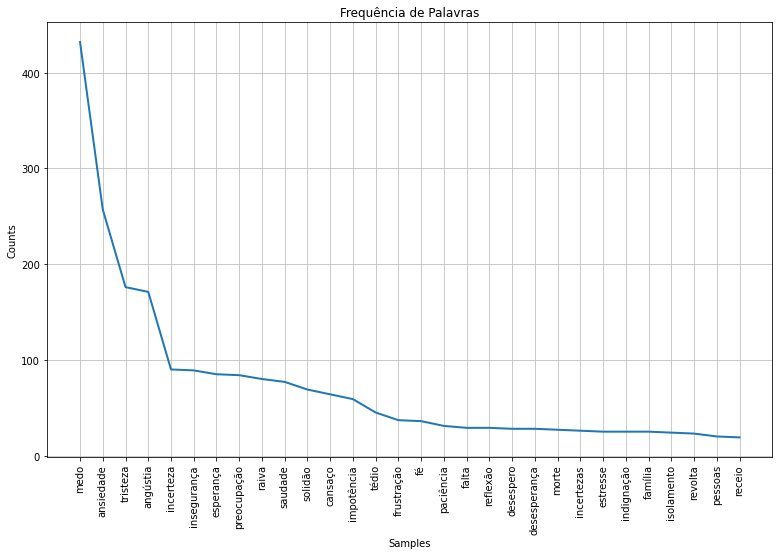

<AxesSubplot:title={'center':'Frequência de Palavras'}, xlabel='Samples', ylabel='Counts'>

In [141]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
texto =  re.findall(r'\b[A-zÀ-úü]+\b', corpus.lower())

texto = [w for w in texto if w not in stopwords]

# juntando os tokens novamente em formato de texto
#texto_limpo = " ".join(sem_stopwords)

# tokenizando 
#tokens = word_tokenize(texto)

# contagem de frequencia
fd = FreqDist(texto)
print("20 palavras mais frequentes:")
print(fd.most_common(20))

# plot
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 8))
fd.plot(30, title = "Frequência de Palavras")

In [238]:
print(fd.most_common(20))

[('medo', 432), ('ansiedade', 257), ('tristeza', 176), ('angústia', 171), ('incerteza', 90), ('insegurança', 89), ('esperança', 85), ('preocupação', 84), ('raiva', 80), ('saudade', 77), ('solidão', 69), ('cansaço', 64), ('impotência', 59), ('tédio', 45), ('frustração', 37), ('fé', 36), ('paciência', 31), ('falta', 29), ('reflexão', 29), ('desespero', 28)]


In [142]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [143]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      #max_words = 150,
                      max_font_size = 500,
                      width=6000, height=4000).generate(corpus)

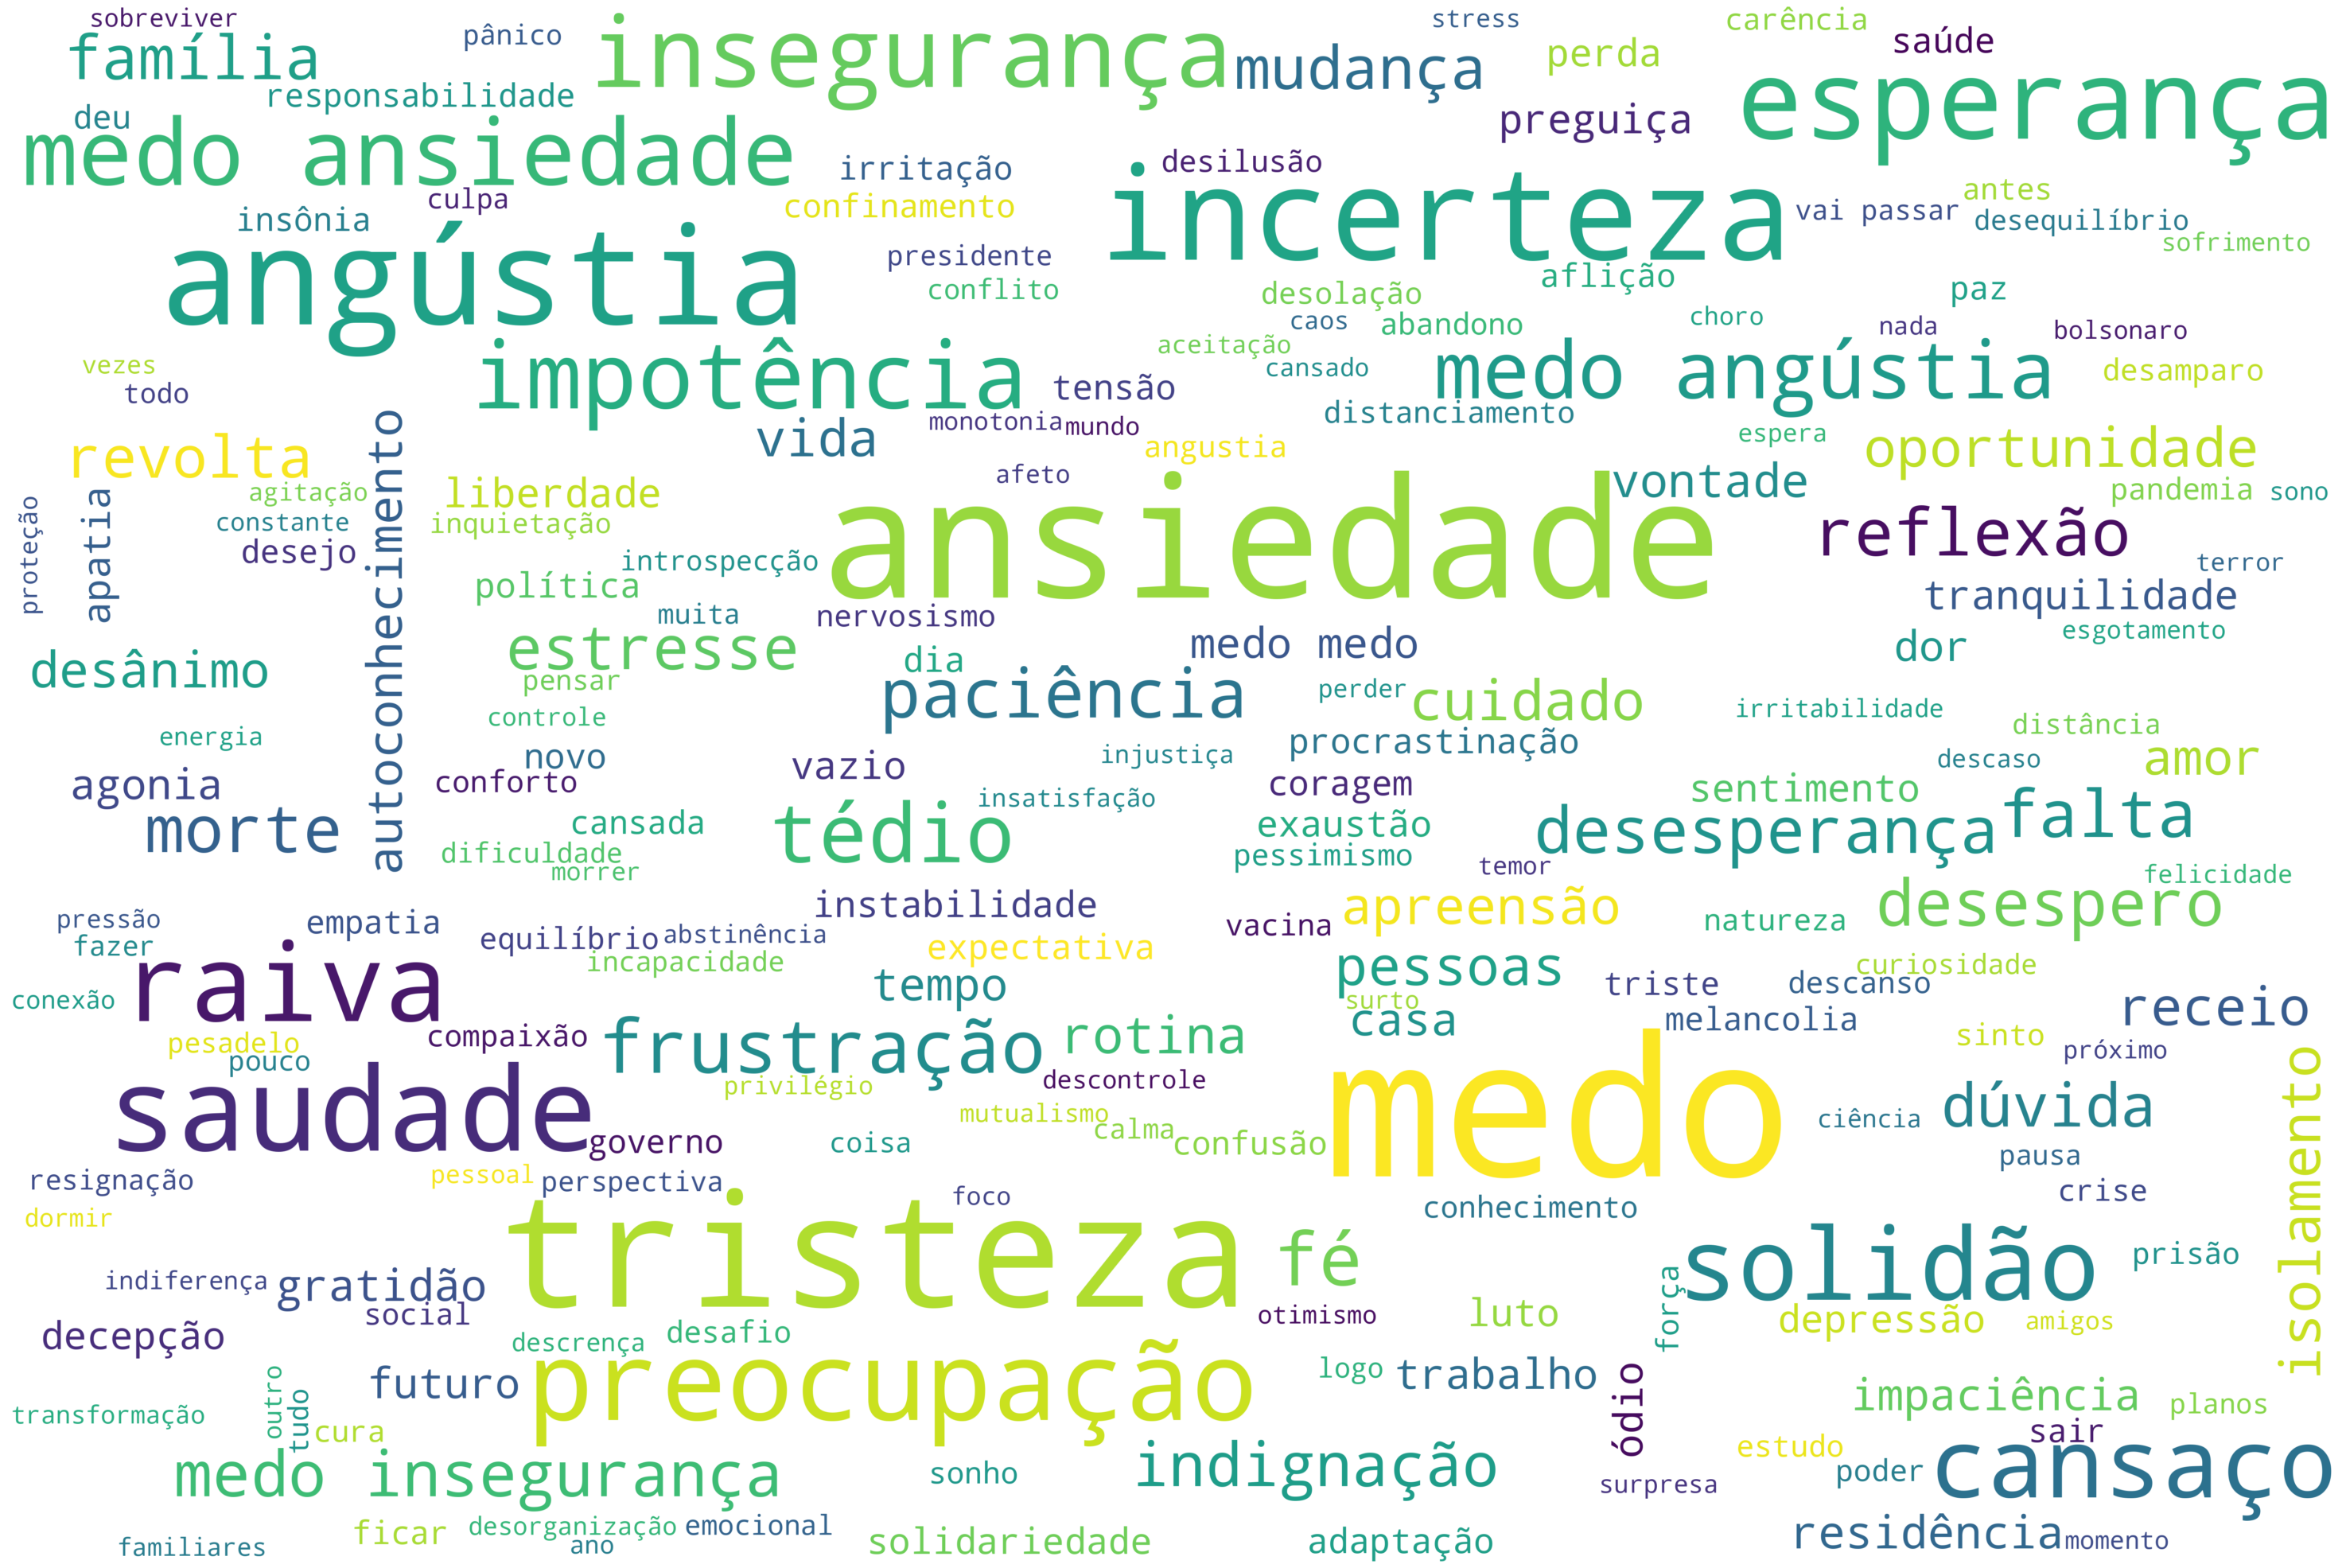

In [144]:
plt.figure(figsize=(60,36))
plt.imshow(wordcloud, interpolation='bilinear')
fig = plt.gcf()
plt.axis("off")
plt.show()
fig.savefig("cloud.png")

In [218]:
df["palavras_proc"] = palavras

In [219]:
df.shape

(1115, 5)

In [220]:
df = df.dropna()

In [221]:
df.shape

(1024, 5)

In [222]:
df = df[df["palavras_proc"].str.len()>0]

In [223]:
df.shape

(1023, 5)

In [224]:
df.head()

sonhos_norm  \
0  atravessei uma praça onde tinha uma manifestaç...   
1  estava em um festival . ouvi uma explosão . ab...   
2  lo numa pedra . ilhada sobre o mar . observo d...   
3  sonhei que bolsonaro dava um golpe de estado e...   
4  eu estava em perigo . minha casa tava desmoron...   

                                     poucas_palavras  \
0                            Ansiedade, medo, pânico   
1                        Ansiedade / Medo / Saudade    
2                  Exílio, solidao, silêncio, cura!    
3  Ansiedade, medo, vulnerabilidade; pulmão asmát...   
4             Desespero carência preocupação extrema   

                                          como_afeta                   topic  \
0  Afetou um pouco, minha rotina não foi muito al...  todos_brasil_bolsonaro   
1  Afetou bastante. Estou em isolamento parcial, ...                   outro   
2  Afetou demais. Estou em isolamento total. Saio...          mar_praia_água   
3  Afetou demais. Estou em isolamento total. Saio...  todos_brasil_bolsonaro   
4  Afetou demais. Estou em isolamento total. Saio...                   outro   

                                    palavras_proc  
0                           ansiedade medo pânico  
1                          ansiedade medo saudade  
2                    exílio solidão silêncio cura  
3  ansiedade medo vulnerabilidade pulmão asmático  
4          desespero carência preocupação extrema

In [225]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(glove_100["mãe"].reshape(1, -1), glove_100["martelo"].reshape(1, -1))

array([[0.0808179]], dtype=float32)

In [228]:
similarities = []
for sonho, palavras in zip(df.sonhos_norm, df.palavras_proc):
    words_sonho= sonho.split(' ')
    words_sonho = [w for w in words_sonho if w in glove_100]
    mean_vec_sonho = np.average(glove_100[words_sonho], axis = 0)
    
    words_palavras = palavras.split(' ')
    words_palavras = [w for w in words_palavras if w in glove_100]
    mean_vec_palavras = np.average(glove_100[words_palavras], axis = 0)
    
    similarities.append(cosine_similarity(mean_vec_sonho.reshape(1, -1), mean_vec_palavras.reshape(1, -1)))
    

In [229]:
df['sims'] = similarities

In [235]:
df[df["sims"] < 0.50].shape

(339, 6)

In [236]:
df[df["sims"] > 0.50].shape

(684, 6)

In [257]:
df[df["sims"] < 0.20].topic.value_counts()

outro                     13
namorado_namorada_ex       2
morte_pai_mãe              2
larissa_espécie_arma       2
bebê_mãe_grávida           2
acordar_cama_dormir        1
todos_brasil_bolsonaro     1
banheiro_dentes_fezes      1
escola_sala_aula           1
mar_praia_água             1
Name: topic, dtype: int64

In [256]:
df[df["sims"] > 0.90].topic.value_counts()

outro                     27
todos_brasil_bolsonaro     6
acordar_cama_dormir        5
morte_pai_mãe              4
namorado_namorada_ex       2
bebê_mãe_grávida           2
escola_sala_aula           2
tomar_vacina_dose          1
chefe_direção_trabalho     1
mar_praia_água             1
reuniões_zumbi_igreja      1
Name: topic, dtype: int64

In [261]:
df[df["sims"] > 0.90]

sonhos_norm  \
13    meu marido monta uma barraca num quintal desco...   
27    . eu tinha uma gripe e ia até o hospital . já ...   
28    sonhei que comecei a trabalhar em uma cafeteri...   
35    tenho um problema grande . raramente lembro de...   
37    sonho com minha irmã e o seu esposo brigando e...   
61    no sonho eu chego da janela do apartamento que...   
76    havia um pássaro voando de forma livre em um c...   
78    sonhei que achava que estava com coronais e fu...   
110   não me recordo do início do sonho . a partir d...   
128   na noite passada tive sonhos . em . um deles e...   
172   sonhei com irdes amiga de e trabalho . era com...   
186   sonhei que estava numa casa de quarentena . is...   
188   tinha esquecido um corpo morto como se ele nun...   
196   pessoas que não tenho mais contato . amigos da...   
204   estava na cozinha e ouvi minha mãe chamar . te...   
206   este sonho aconteceu na madrugada do dia de ma...   
218   nossa.me lembro que era um sonho extremamente ...   
233   sonho tipo ' ' alice ' ' que estou presa no ca...   
234   no sonho eu descobri que estava com covid . qu...   
238   eu estava na minha casa e percebi que a casa d...   
248   me peguei sonhando com a rua que moro onde na ...   
284   sonhei que precisava fazer compras . quando ch...   
292   sonho sempre que estou em outro país e com pes...   
298   sonhei que era humilhado várias vezes seguidas...   
310   sonhei hoje que estava roubando areia de uma c...   
350   eu já tive três pesadelos durante a pandemia ....   
618   tenho sonhado muito com meu casal de gatos sal...   
684   sonhei que estava em um lugar branco deitada e...   
714   no sonho eu estava na rua . era um dia bonito ...   
741   tenho sonhado com frequência com minha mãe que...   
757   sonhei estar em uma rua da qual tenho vaga lem...   
768   sonhei esta noite de junho de com mande-a e aq...   
782   eu fui para maringá . cidade que eu morei no p...   
791   sonhei que compartilhava arquivos da escola no...   
793   swell . ar respirar pensar . saudades abraços ...   
797   eu ia de carona num carro com um casal . ia no...   
802   essa ultima noite sonhei que estava no centro ...   
813   na continuação de alguma situação anterior . q...   
830   . tenho sonhos em loop e estava junto com a jo...   
845   estou caminhando e contemplando o céu e as nuv...   
853   essa noite . estávamos eu . meus filhos e sobr...   
890   eu estava na varanda de uma casa de madeira . ...   
906   sonhei que estava no alto do prédio com minha ...   
911   posso contar vários sonhos . digo . um hoje e ...   
913   eu sempre sonho que estou muito triste sentada...   
968   no meu sonho . eu estava em um local extremame...   
1014  sonho acordado com um mundo melhor . nesse paí...   
1029  na semana passada . sonhei que o meu irmão est...   
1047  sempre estou fugindo antes em um lugar no camp...   
1060  sonhos repetidos com uma casa de madeira . e u...   
1068  estava em uma festa e havia um grupo de pessoa...   
1082  me lembro apenas de acordar assombrada por ser...   

                                        poucas_palavras  \
13    Falta de liberdade de ir e vir, receio de acon...   
27     Medo. Valorização da vida. Não será como antes.    
28                        Melhor previnir do que morrer   
35    Em crise, só de pensar que nao verei mais as p...   
37    Incerteza, medo de perder pessoas queridas, ou...   
61    sensação de estar sendo atacada pela natureza ...   
76             Sufocante todo dia parecer o mesmo dia.    
78     Ansiedade e medo de alguém próximo se contaminar   
110   Faz mais de 30 dias que estou de home office. ...   
128   Dificuldade financeira, ajuda a familia, equil...   
172                              N tenho mais palavras    
186   O qur mais angustia é a incerteza de cimo será...   
188            Um momento necessário para a consciência   
196   Insegurança com o que o vírus pode causar para...   
204   Ansiedade, medo de adoece

In [239]:
sentimentos = fd.most_common(20)

In [240]:
sentimentos

[('medo', 432),
 ('ansiedade', 257),
 ('tristeza', 176),
 ('angústia', 171),
 ('incerteza', 90),
 ('insegurança', 89),
 ('esperança', 85),
 ('preocupação', 84),
 ('raiva', 80),
 ('saudade', 77),
 ('solidão', 69),
 ('cansaço', 64),
 ('impotência', 59),
 ('tédio', 45),
 ('frustração', 37),
 ('fé', 36),
 ('paciência', 31),
 ('falta', 29),
 ('reflexão', 29),
 ('desespero', 28)]

In [245]:
sentimentos_por_topico = {}
#sentimentos_por_topico["mortepaimae"]["medo"] = 15

for top in df.topic.unique():
    temp = df[df["topic"] == top]
    sentimentos_por_topico[top]

In [246]:
df[df["topic"] == "mar_praia_água"]

sonhos_norm  \
2     lo numa pedra . ilhada sobre o mar . observo d...   
26    várias situações na mesma noite : estava em um...   
36    estava com minha prima numa casa a beira mar ....   
42    sonhei que estava na minha casa . mas atrás de...   
63    o mar invadia minha cidade que é distante do l...   
70    tenho sonhado com praias no meio da cidade . s...   
170   sonhei essa noite que nadava muito . nadava no...   
206   este sonho aconteceu na madrugada do dia de ma...   
257   na verdade foram dois sonhos . em noites difer...   
299   meu sonho tem duas interfaces : primeiramente ...   
344   sonhei que eu e minha esposa estávamos numa pi...   
373   estou mar . vejo próximo a mim meu pai . e out...   
374   tenho um sonho muito recorrente que é relacion...   
415   sonhei que estava nadando em uma onda muito gr...   
419   tenho tido sonhos relacionados a traição . a “...   
425   estava numa cachoeira . era extremamente grand...   
439   sonhei que estava em um hotel . que era um pré...   
457   sonhei que as praias seriam invadidas pelo mar...   
478   estava numa viagem para uma cidade praiana pró...   
527   eu estava no centro de belo horizonte . maçom ...   
532   sonho estranho estávamos todos em uma espécie ...   
555   meus sonhos se ` ` adaptaram ' ' ao confinamen...   
572     sonhei correndo na praia com a pessoa que gosto   
576   sonhei que corria bastante por muitos lugares ...   
579   sonhei que estava em uma praia de areias cinza...   
581   sonhei com uma nado em uma piscina grande . qu...   
611   com muita frequência sonho com multidões . ou ...   
651   lembro de ver tartarugas marinha num canal suj...   
656   era uma enchente que invadia o prédio comercia...   
657   locais desconhecidos . geralmente praia . tent...   
672   sonhei que estava andando em uma praia com ami...   
718   estava com mais duas pessoas no mar . de repen...   
747   eu estava em uma praia . no mar . quando as on...   
749   eu estava dentro da água . em um mar . e carre...   
825   no meio da rodovia próxima de onde moro . havi...   
831   ` ` estava num parque aquático . nele via um t...   
856   sonha que estou morrendo acordo assustada . so...   
858   sonhei que estava num lugar embaixo d'água . m...   
866   sonhei que eu comprava quatro tubarões e uma b...   
871   eu não sei se é um sonho longo . ou se são vár...   
883   dentre vários sonhos bizarros ao longo da pand...   
905   no sonho eu abria a porta de casa e ao invés d...   
909   era uma praia e eu estava com uns amigos e era...   
933   eu assistia sem participar . estava acompanhan...   
979   normalmente eu tenho muitos pesadelos . ou mel...   
990   sonhei que estava mergulhada na água . e me se...   
1003  sonhei que estava em são luís . minha cidade n...   
1011  sonhei na madrugada do dia que estava em uma c...   
1061  estava no mar . na praia de nazaré em portugal...   
1066  meus sonhos têm sido desconexos e totalmente e...   
1075                         um lago com sanguessugas .   

                                        poucas_palavras  \
2                     Exílio, solidao, silêncio, cura!    
26                       Insegurança, medo, luz, calma.   
36    Descanso, tranquilidade, introspecção, leitura...   
42    Preocupação, esperança, preservação, vontade d...   
63    Apreensão, insegurança, instabilidade, receio,...   
70                         Insegurança, incerteza, medo   
170                             Medo, Raiva, Frustração   
206   medo de passar fome, medo de perder as pessoas...   
257   Gratidão, tristeza, medo, oscilação e oportuni...   
299                     Ansiedade. Preocupação. Temor.    
344                 Medo, ansiedade, saudade, família.    
373                  Tristeza, resiliência, impotência    
374                  Incerteza, resignificação, mudança   
415           Futuro, crise, cura, família, normalidade   
419   Incerteza, insegurança, desespero, depressão, ...   
425   Reflexão, ansiedade, auto

In [272]:
df[df["topic"] == "morte_pai_mãe"]

sonhos_norm  \
15               que fui arrebatada que tinha morrido .   
24    meu pai estava para ser colocado no caixão e s...   
41    sonhei que tinha um tio meu precisando que alg...   
49    filho de um irmão falecido me chamando . apena...   
61    no sonho eu chego da janela do apartamento que...   
...                                                 ...   
1019  sonhei que ouvia um choro desesperador vindo d...   
1029  na semana passada . sonhei que o meu irmão est...   
1033  sonhei que via uma pessoa que era apontado com...   
1038  sonhei com meu avô que já faleceu há anos . se...   
1091  sonhei que eu era um homem muito bonito preste...   

                                        poucas_palavras  \
15     Anciedade as vezes desespero.As vezes esperança.   
24                       Emotivamente abalada e cansada   
41                               Preocupação, tristeza    
49                               Esquisito, diferente.    
61    sensação de estar sendo atacada pela natureza ...   
...                                                 ...   
1019                      Medo; esgotamento, impotência   
1029  Tristeza, alegria, paz ... porque creio que só...   
1033                                         Impotência   
1038  Medo, insegurança, impotência, vontades, inten...   
1091                  Muito trabalho, pausa, apagamento   

                                             como_afeta          topic  \
15    Afetou demais. Estou em isolamento total. Saio...  morte_pai_mãe   
24    Afetou demais. Estou em isolamento total. Saio...  morte_pai_mãe   
41    Afetou demais. Estou em isolamento total. Saio...  morte_pai_mãe   
49    Afetou demais. Estou em isolamento total. Saio...  morte_pai_mãe   
61    Afetou bastante. Estou em isolamento parcial, ...  morte_pai_mãe   
...                                                 ...            ...   
1019  Eu sempre tive a liberdade de trabalhar em cas...  morte_pai_mãe   
1029  Parece que os dias estão mais curtos, mesmo tr...  morte_pai_mãe   
1033  Tenho ficado em casa direto... visitei poucas ...  morte_pai_mãe   
1038  Passo o dia todo em casa estudando. Antes eu p...  morte_pai_mãe   
1091  A única diferença atualmente é o uso de máscar...  morte_pai_mãe   

                                          palavras_proc            sims  
15      ansiedade as vezes desespero as vezes esperança   [[0.7519123]]  
24                       emotivamente abalada e cansada    [[0.522903]]  
41                                 preocupação tristeza  [[0.48880437]]  
49                                  esquisito diferente  [[0.60321474]]  
61    sensação de estar sendo atacada pela natureza ...   [[0.9402963]]  
...                                                 ...             ...  
1019                        medo esgotamento impotência  [[0.44323772]]  
1029  tristeza alegria paz porque creio que só cai u...   [[0.9489249]]  
1033                                         impotência  [[0.16650581]]  
1038  medo insegurança impotência vontades intensidades  [[0.43019894]]  
1091                    muito trabalho pausa apagamento  [[0.76523554]]  

[68 rows x 6 columns]

In [271]:
conjunto_palavras = ""
for texto in df[df["topic"] == "tomar_vacina_dose"].palavras_proc:
    try:
        conjunto_palavras += " "+texto
    except:
        conjunto_palavras += ""
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
texto =  re.findall(r'\b[A-zÀ-úü]+\b', conjunto_palavras.lower())

texto = [w for w in texto if w not in stopwords]


# contagem de frequencia
fd = FreqDist(texto)
print("20 palavras mais frequentes:")
print(fd.most_common(20))

# plot
#import matplotlib.pyplot as plt
#plt.figure(figsize = (13, 8))
#fd.plot(30, title = "Frequência de Palavras")

20 palavras mais frequentes:
[('medo', 2), ('ansiedade', 2), ('melancolia', 2), ('angústia', 2), ('valorização', 1), ('vida', 1), ('antes', 1), ('desamparo', 1), ('tédio', 1), ('dia', 1), ('noite', 1), ('dúvida', 1), ('cuidados', 1), ('saúde', 1), ('mental', 1), ('isolamento', 1), ('social', 1), ('vacina', 1), ('pressão', 1), ('cansaço', 1)]


[nltk_data] Downloading package stopwords to /home/joao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [255]:
conjunto_palavras = ""
for texto in df[df["topic"] == "máscara_pandemia_ônibus"].palavras_proc:
    try:
        conjunto_palavras += " "+texto
    except:
        conjunto_palavras += ""
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
texto =  re.findall(r'\b[A-zÀ-úü]+\b', conjunto_palavras.lower())

texto = [w for w in texto if w not in stopwords]


# contagem de frequencia
fd = FreqDist(texto)
print("20 palavras mais frequentes:")
print(fd.most_common(20))

# plot
#import matplotlib.pyplot as plt
#plt.figure(figsize = (13, 8))
#fd.plot(30, title = "Frequência de Palavras")

20 palavras mais frequentes:
[('medo', 22), ('angústia', 9), ('insegurança', 8), ('ansiedade', 8), ('esperança', 7), ('preocupação', 6), ('incerteza', 6), ('saudade', 5), ('tristeza', 5), ('fé', 4), ('impotência', 4), ('desesperança', 3), ('paciência', 3), ('agonia', 3), ('solidão', 3), ('cansaço', 2), ('indignação', 2), ('insônia', 2), ('dessa', 2), ('desespero', 2)]


[nltk_data] Downloading package stopwords to /home/joao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [265]:
df[df["palavras_proc"].str.contains("fé")].topic.value_counts()

outro                      16
máscara_pandemia_ônibus     4
namorado_namorada_ex        4
mar_praia_água              4
morte_pai_mãe               2
escola_sala_aula            2
acordar_cama_dormir         1
bebê_mãe_grávida            1
Name: topic, dtype: int64

In [268]:
df[df["palavras_proc"].str.contains("solidão")].topic.value_counts()

outro                      35
morte_pai_mãe               6
acordar_cama_dormir         4
larissa_espécie_arma        4
namorado_namorada_ex        3
bebê_mãe_grávida            3
escola_sala_aula            3
máscara_pandemia_ônibus     3
banheiro_dentes_fezes       2
mar_praia_água              1
todos_brasil_bolsonaro      1
Name: topic, dtype: int64

In [270]:
df.topic.value_counts()

outro                      579
morte_pai_mãe               68
mar_praia_água              51
acordar_cama_dormir         47
máscara_pandemia_ônibus     46
namorado_namorada_ex        46
escola_sala_aula            41
todos_brasil_bolsonaro      40
larissa_espécie_arma        38
bebê_mãe_grávida            22
chefe_direção_trabalho      14
reuniões_zumbi_igreja       12
banheiro_dentes_fezes       11
tomar_vacina_dose            8
Name: topic, dtype: int64

In [278]:
df_pesadelo= pd.read_csv(PATH+"/sonhos_topicos.csv")

In [282]:
df_pesadelo = df_pesadelo[['topic','tipo']]
df_pesadelo.dropna(axis=0, inplace=True)
df_pesadelo.reset_index(drop=True, inplace=True)

In [283]:
target = []
for t in df_pesadelo.tipo:
    if "ruim" in t or "pesadelo" in t:
        target.append(1)
    else:
        target.append(0)
    
df_pesadelo['target'] = target

In [284]:
df_pesadelo.head()

topic                                               tipo  \
0         escola_sala_aula                        “essa noite, tive um sonho”   
1                    outro  “essa noite, tive um sonho ruim” (mas não era ...   
2                    outro                        “essa noite, tive um sonho”   
3                    outro                     “essa noite, tive um pesadelo"   
4  máscara_pandemia_ônibus  “essa noite, tive um sonho ruim” (mas não era ...   

   target  
0       0  
1       1  
2       0  
3       1  
4       1

In [302]:
df_pesadelo[df_pesadelo["topic"] == "escola_sala_aula"].shape[0]

28

In [288]:
df_pesadelo[df_pesadelo["target"] == 0].topic.value_counts()

outro                      187
namorado_namorada_ex        23
mar_praia_água              23
todos_brasil_bolsonaro      22
escola_sala_aula            18
morte_pai_mãe               16
acordar_cama_dormir         12
larissa_espécie_arma        11
bebê_mãe_grávida            10
máscara_pandemia_ônibus     10
chefe_direção_trabalho       5
banheiro_dentes_fezes        3
tomar_vacina_dose            3
reuniões_zumbi_igreja        2
Name: topic, dtype: int64

In [300]:
df_pesadelo.topic.value_counts()

outro                      406
morte_pai_mãe               48
mar_praia_água              43
máscara_pandemia_ônibus     42
acordar_cama_dormir         38
larissa_espécie_arma        34
todos_brasil_bolsonaro      33
namorado_namorada_ex        32
escola_sala_aula            28
bebê_mãe_grávida            15
banheiro_dentes_fezes       12
reuniões_zumbi_igreja       10
chefe_direção_trabalho       9
tomar_vacina_dose            8
Name: topic, dtype: int64

In [315]:
res = pd.DataFrame()
pesadelos = []
normais = []
tops = []
totais = []
for top in df_pesadelo.topic.unique():
    if top != "outro":
        tops.append(top)
        totais.append(df_pesadelo[df_pesadelo["topic"] == top].shape[0])
        total = df_pesadelo[df_pesadelo["topic"] == top].shape[0] / 100
        normais.append(df_pesadelo[df_pesadelo["topic"] == top].target.value_counts()[0] / total)
        pesadelos.append(df_pesadelo[df_pesadelo["topic"] == top].target.value_counts()[1] / total)
    
res["Tópico"] = tops
res["Num Relatos"] = totais
res["Sonhos Normais (%)"] = normais
res["Pesadelos (%)"] = pesadelos

In [316]:
res

Tópico  Num Relatos  Sonhos Normais (%)  Pesadelos (%)
0          escola_sala_aula           28           64.285714      35.714286
1   máscara_pandemia_ônibus           42           23.809524      76.190476
2             morte_pai_mãe           48           33.333333      66.666667
3      larissa_espécie_arma           34           32.352941      67.647059
4       acordar_cama_dormir           38           31.578947      68.421053
5      namorado_namorada_ex           32           71.875000      28.125000
6          bebê_mãe_grávida           15           66.666667      33.333333
7            mar_praia_água           43           53.488372      46.511628
8    todos_brasil_bolsonaro           33           66.666667      33.333333
9    chefe_direção_trabalho            9           55.555556      44.444444
10    reuniões_zumbi_igreja           10           20.000000      80.000000
11    banheiro_dentes_fezes           12           25.000000      75.000000
12        tomar_vacina_dose            8           37.500000      62.500000